In [ ]:
#%matplotlib notebook

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [2]:
# Read file with plotting information
plot_data_csv = "../Output/Data_for_plotting.csv"

# Read data into Pandas data frames
plot_data_df = pd.read_csv(plot_data_csv)

In [3]:
# Add Totals for migrants
plot_data_df["Tot Migrant"] = plot_data_df.iloc[:,3:7].sum(axis=1)
plot_data_df["Tot Indic"] = plot_data_df.iloc[:,8:12].sum(axis=1)
#plot_data_df

In [9]:
x_axis = plot_data_df.loc[plot_data_df["Indicator"] == "Personal remittances, received (current US$)"]["Origin"]
y_axis = plot_data_df.loc[plot_data_df["Indicator"] == "Personal remittances, received (current US$)"]["Tot Indic"]

xGDP_axis = plot_data_df.loc[plot_data_df["Indicator"] == "GDP (current US$)"]["Origin"]
yGDP_axis = plot_data_df.loc[plot_data_df["Indicator"] == "GDP (current US$)"]["Tot Indic"]

In [10]:
ytick = np.arange(220000000000,32620000000000,6480000000000)

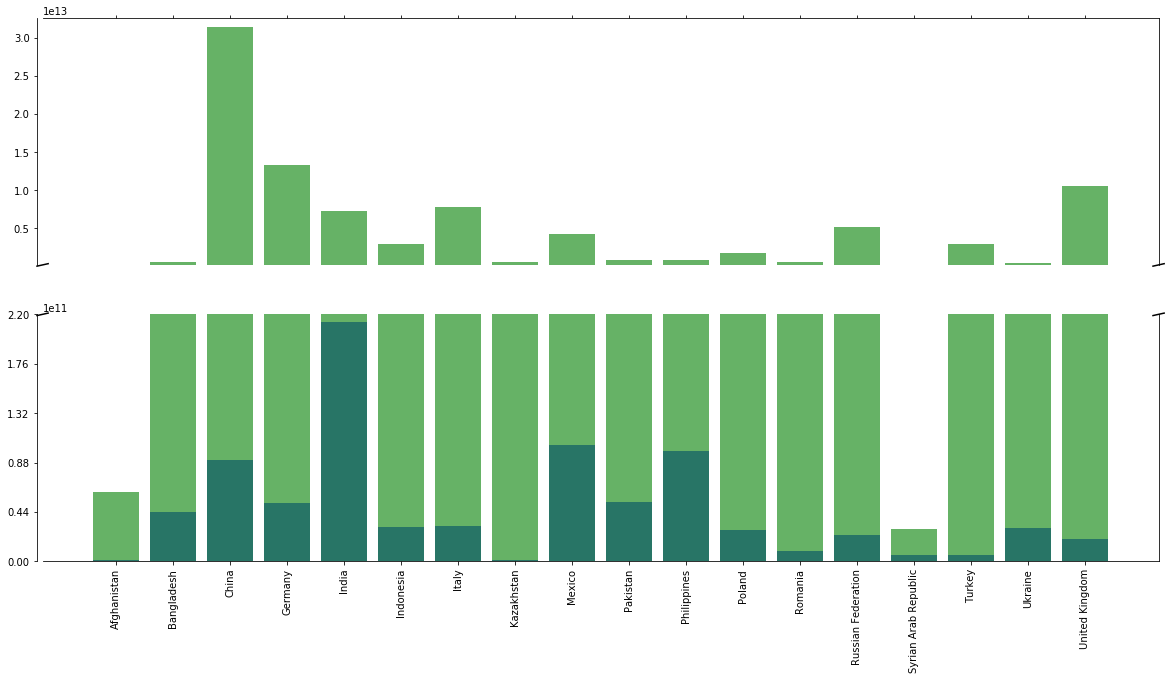

In [19]:
fig, (ax, ax2) = plt.subplots(2, 1,figsize=(20,10), sharex=True)

# plot the same data on both plots
ax.bar(x_axis, y_axis, color='b', alpha=0.6, align="center")
ax2.bar(x_axis, y_axis, color='b', alpha=0.6, align="center")
ax.bar(x_axis, yGDP_axis, color='g', alpha=0.6, align="center")
ax2.bar(x_axis, yGDP_axis, color='g', alpha=0.6, align="center")

# zoom-in / limit the view to different portions of the data
ax.set_ylim(220000000000, 32620000000000)  # GDP
ax2.set_ylim(0, 220000000000)  # Remittances
ax2.yaxis.set_major_locator(MultipleLocator(44000000000))

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax.spines['left'].set_position(('outward', 6))
ax2.spines['left'].set_position(('outward', 6))
ax2.tick_params(axis='x', rotation=90)


#ax2.xticks(np.arange(min(x), max(x)+1, 1.0))

#plt.xticks(x_axis, x_axis, rotation='vertical')

d = .005  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

plt.show()



In [ ]:

plot_yrcol_df = pd.DataFrame({
    "2000": [45,18,26,48,25],
    "2005": [4,8,6,7,7],
    "Countries": ["India","Mexico","Russia","China","Germany"]
})

plot_yrcol_df

In [ ]:
x_axis = plot_yrcol_df.columns[0:2]


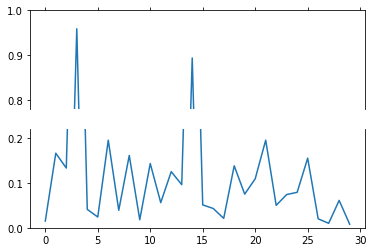

In [14]:
"""
Broken axis example, where the y-axis will have a portion cut out.
"""
import matplotlib.pyplot as plt
import numpy as np


# 30 points between [0, 0.2) originally made using np.random.rand(30)*.2
pts = np.array([
    0.015, 0.166, 0.133, 0.159, 0.041, 0.024, 0.195, 0.039, 0.161, 0.018,
    0.143, 0.056, 0.125, 0.096, 0.094, 0.051, 0.043, 0.021, 0.138, 0.075,
    0.109, 0.195, 0.050, 0.074, 0.079, 0.155, 0.020, 0.010, 0.061, 0.008])

# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the same data on both axes
ax.plot(pts)
ax2.plot(pts)

# zoom-in / limit the view to different portions of the data
ax.set_ylim(.78, 1.)  # outliers only
ax2.set_ylim(0, .22)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0,0), (0,1),
# (1,0), and (1,1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()